In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/reviews.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [3]:
df = pd.read_csv('/reviews.csv')
print(df.shape)
print(f'Number of samples: {df.shape[0]}\nNumber of features: {df.shape[1]}')

(61594, 5)
Number of samples: 61594
Number of features: 5


In [4]:
df = df.head(10000)
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
9995,2022-06-17 09:34:24,Please make sure that the panels don't lag on ...,3,0,NaN
9996,2022-06-17 09:32:57,"This app has become a problem, why do you alwa...",1,0,NaN
9997,2022-06-17 09:20:21,"The app is good, but the lyric won't show for ...",5,0,NaN
9998,2022-06-17 09:17:26,Good App..Doesn't have ads between songs and h...,4,0,NaN


In [5]:
df.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
df


,Review,Rating,Total_thumbsup
0,"Great music service, the audio is high quality...",5,2
1,Please ignore previous negative rating. This a...,5,1
2,"This pop-up ""Get the best Spotify experience o...",4,0
3,Really buggy and terrible to use as of recently,1,1
4,Dear Spotify why do I get songs that I didn't ...,1,1
...,...,...,...
9995,Please make sure that the panels don't lag on ...,3,0
9996,"This app has become a problem, why do you alwa...",1,0
9997,"The app is good, but the lyric won't show for ...",5,0
9998,Good App..Doesn't have ads between songs and h...,4,0


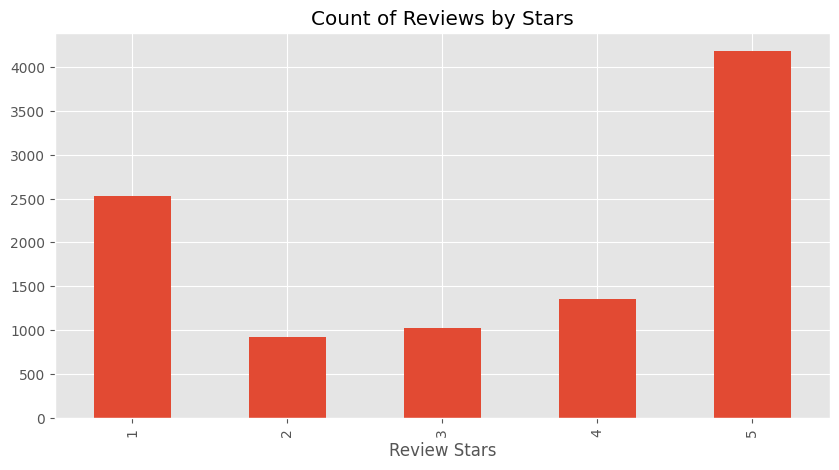

In [6]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [10]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
df["sentiment"] = df["Review"].apply(lambda x:sia.polarity_scores(x))
df

,Review,Rating,Total_thumbsup,sentiment
0,"Great music service, the audio is high quality...",5,2,"{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp..."
1,Please ignore previous negative rating. This a...,5,1,"{'neg': 0.243, 'neu': 0.353, 'pos': 0.404, 'co..."
2,"This pop-up ""Get the best Spotify experience o...",4,0,"{'neg': 0.107, 'neu': 0.635, 'pos': 0.258, 'co..."
3,Really buggy and terrible to use as of recently,1,1,"{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp..."
4,Dear Spotify why do I get songs that I didn't ...,1,1,"{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou..."
...,...,...,...,...
9995,Please make sure that the panels don't lag on ...,3,0,"{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp..."
9996,"This app has become a problem, why do you alwa...",1,0,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp..."
9997,"The app is good, but the lyric won't show for ...",5,0,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou..."
9998,Good App..Doesn't have ads between songs and h...,4,0,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp..."


In [12]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']

    res[text] = sia.polarity_scores(text)
res

  0%|          | 0/10000 [00:00<?, ?it/s]

{'Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.': {'neg': 0.0,
  'neu': 0.564,
  'pos': 0.436,
  'compound': 0.9211},
 'Please ignore previous negative rating. This app is super great. I give it five stars+': {'neg': 0.243,
  'neu': 0.353,
  'pos': 0.404,
  'compound': 0.6249},
 'This pop-up "Get the best Spotify experience on Android 12" is too annoying. Please let\'s get rid of this.': {'neg': 0.107,
  'neu': 0.635,
  'pos': 0.258,
  'compound': 0.5859},
 'Really buggy and terrible to use as of recently': {'neg': 0.296,
  'neu': 0.704,
  'pos': 0.0,
  'compound': -0.5209},
 "Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?": {'neg': 0.0,
  'neu': 0.74,
  'pos': 0.26,
  'compound': 0.7149},
 'The player controls sometimes disappear for no reason. App restart forgets what I was playing but fixes the issue.': {'neg': 0.157,
  'neu': 0.771,
  'pos': 0.072,
  'compound': 

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
import string

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lowercase
    text = text.lower()
    # remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words with numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stopwords
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df["sentiments"] = df["Review"].apply(lambda x: sid.polarity_scores(x))
df

,Review,Rating,Total_thumbsup,sentiment,sentiments
0,"Great music service, the audio is high quality...",5,2,"{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp...","{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp..."
1,Please ignore previous negative rating. This a...,5,1,"{'neg': 0.243, 'neu': 0.353, 'pos': 0.404, 'co...","{'neg': 0.243, 'neu': 0.353, 'pos': 0.404, 'co..."
2,"This pop-up ""Get the best Spotify experience o...",4,0,"{'neg': 0.107, 'neu': 0.635, 'pos': 0.258, 'co...","{'neg': 0.107, 'neu': 0.635, 'pos': 0.258, 'co..."
3,Really buggy and terrible to use as of recently,1,1,"{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...","{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp..."
4,Dear Spotify why do I get songs that I didn't ...,1,1,"{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou...","{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou..."
...,...,...,...,...,...
9995,Please make sure that the panels don't lag on ...,3,0,"{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...","{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp..."
9996,"This app has become a problem, why do you alwa...",1,0,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...","{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp..."
9997,"The app is good, but the lyric won't show for ...",5,0,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...","{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou..."
9998,Good App..Doesn't have ads between songs and h...,4,0,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...","{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp..."


In [17]:
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)
df.head()

,Review,Rating,Total_thumbsup,sentiment,neg,neu,pos,compound
0,"Great music service, the audio is high quality...",5,2,"{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp...",0.000,0.564,0.436,0.9211
1,Please ignore previous negative rating. This a...,5,1,"{'neg': 0.243, 'neu': 0.353, 'pos': 0.404, 'co...",0.243,0.353,0.404,0.6249
2,"This pop-up ""Get the best Spotify experience o...",4,0,"{'neg': 0.107, 'neu': 0.635, 'pos': 0.258, 'co...",0.107,0.635,0.258,0.5859
3,Really buggy and terrible to use as of recently,1,1,"{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...",0.296,0.704,0.000,-0.5209
4,Dear Spotify why do I get songs that I didn't ...,1,1,"{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou...",0.000,0.740,0.260,0.7149


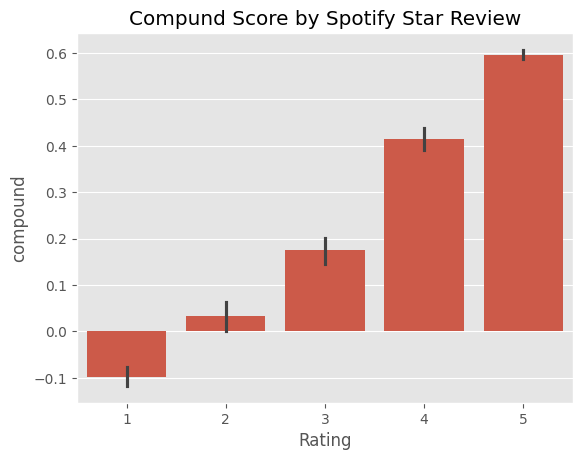

In [18]:
ax = sns.barplot(data=df, x='Rating', y='compound')
ax.set_title('Compund Score by Spotify Star Review')
plt.show()

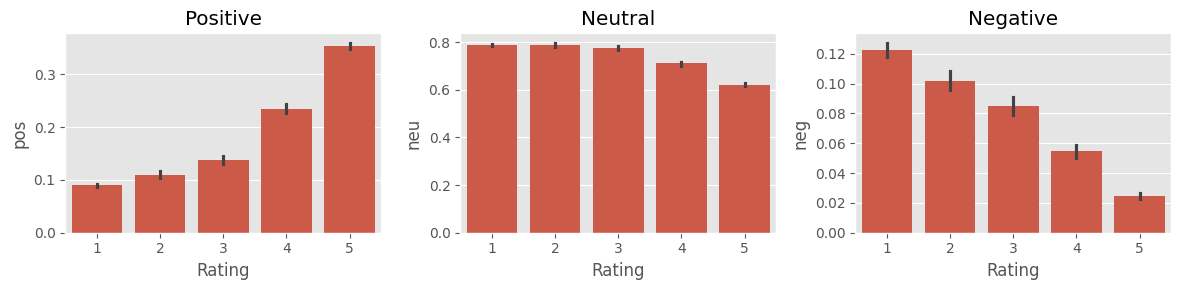

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=df, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=df, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Roberta

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [22]:
example= df['Review'][75]
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)


{'roberta_neg': np.float32(0.33920455), 'roberta_neu': np.float32(0.581514), 'roberta_pos': np.float32(0.07928147)}


In [23]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [26]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# use a smaller, faster model if you want
MODEL_NAME = "distilroberta-base"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

# build sentiment pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=-1  # CPU
)

# Example: apply truncation with max length
result = sentiment_pipeline(
    "This is a very long review text ..." * 100,
    truncation=True,
    max_length=512   # RoBERTa/DistilRoBERTa usually max 512
)

print(result)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


[{'label': 'LABEL_0', 'score': 0.5264696478843689}]


In [27]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Rating'})
results_df['Rating'] = pd.to_numeric(results_df['Rating'], errors='coerce')
results_df = results_df.merge(df, how='left')

In [28]:
results_df.columns

Index(['Rating', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Review', 'Total_thumbsup',
       'sentiment', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

/tmp/ipython-input-4189004886.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results_df.replace([np.inf, -np.inf], np.nan, inplace=True)


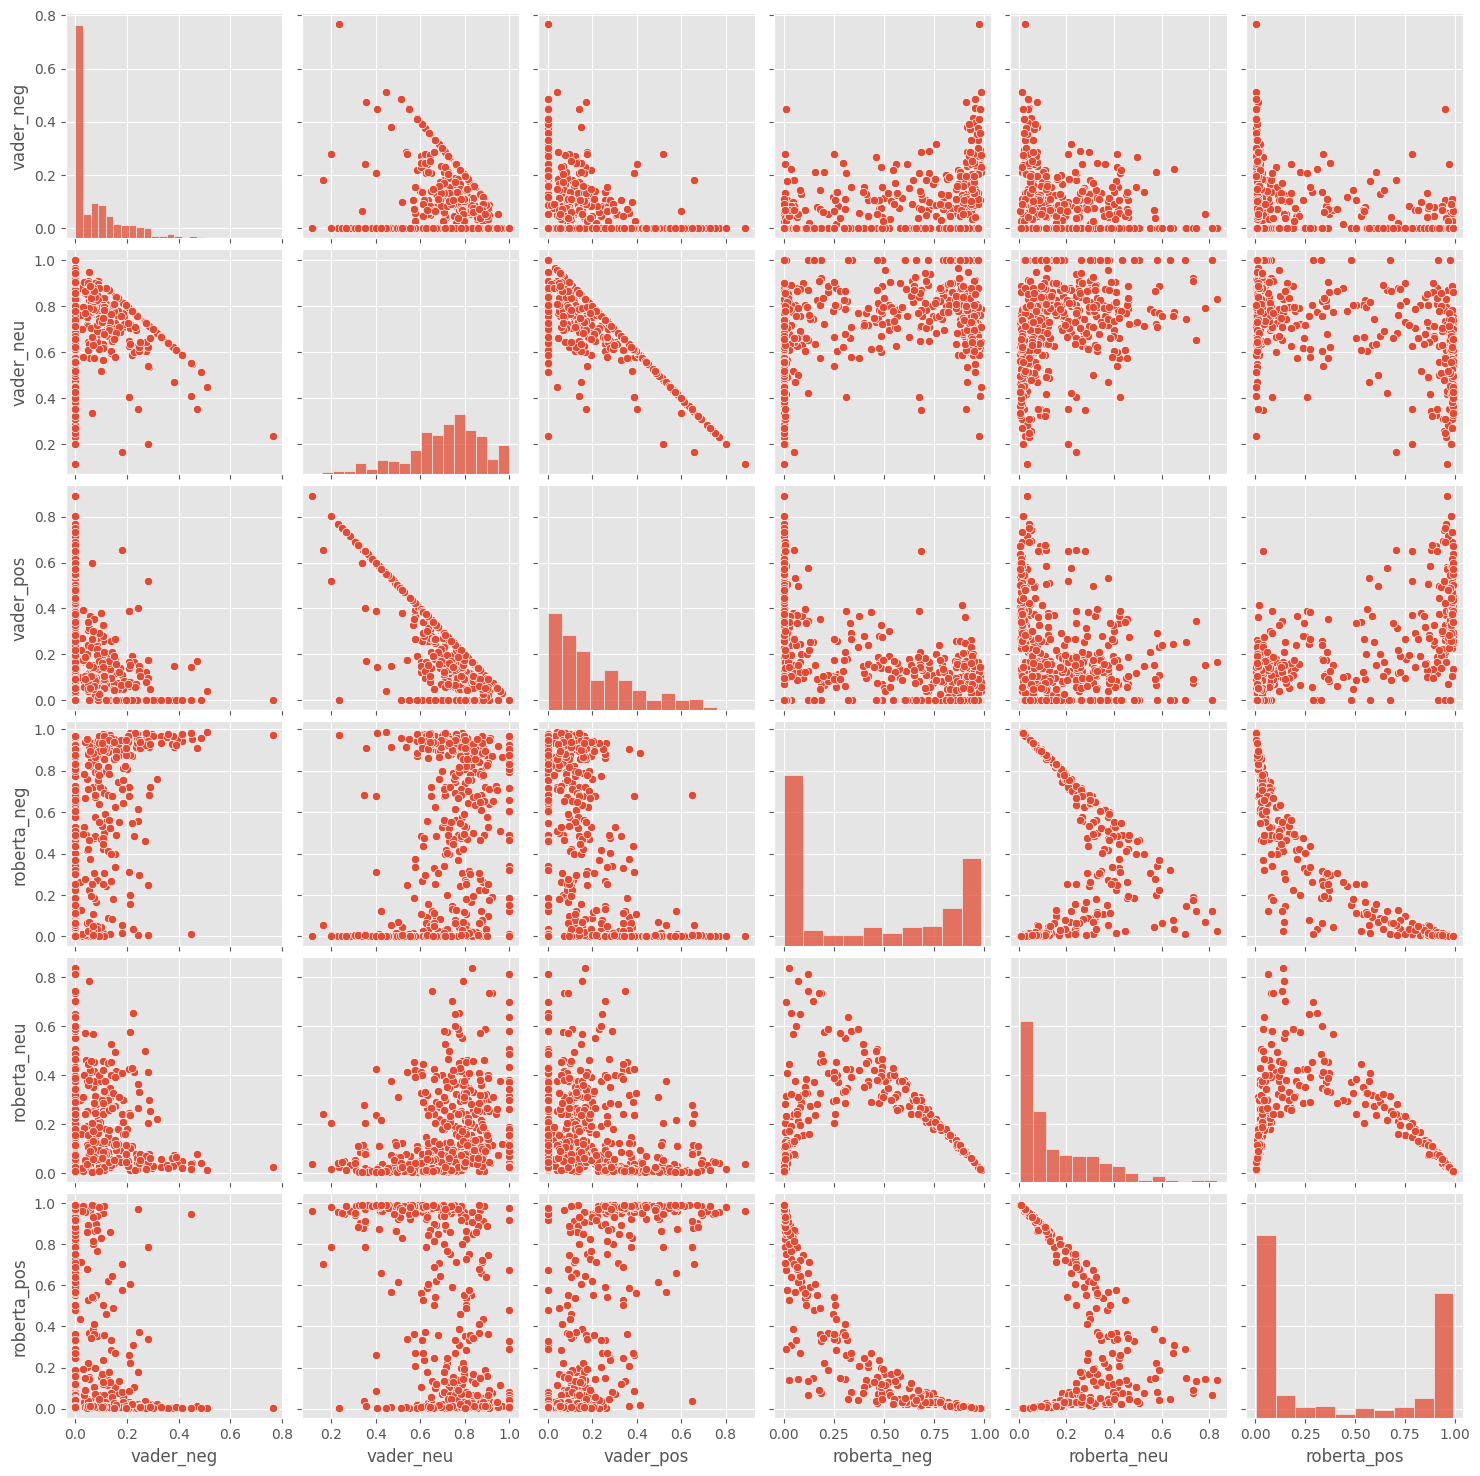

In [29]:
import numpy as np

results_df['vader_neg'] = pd.to_numeric(results_df['vader_neg'], errors='coerce')  # Optional: Convert to numeric if applicable
results_df['vader_neu'] = pd.to_numeric(results_df['vader_neu'], errors='coerce')  # Optional: Convert to numeric if applicable
results_df['vader_pos'] = pd.to_numeric(results_df['vader_pos'], errors='coerce')  # Optional: Convert to numeric if applicable
results_df['roberta_neg'] = pd.to_numeric(results_df['roberta_neg'], errors='coerce')
results_df['roberta_neu'] = pd.to_numeric(results_df['roberta_neu'], errors='coerce')
results_df['roberta_pos'] = pd.to_numeric(results_df['roberta_pos'], errors='coerce')

results_df.replace([np.inf, -np.inf], np.nan, inplace=True)




sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'])
plt.show()

In [ ]:
Transformer Piperline

In [30]:
from transformers import pipeline

# create sentiment-analysis pipeline
sent_pipeline = pipeline("sentiment-analysis")

# run on one text
print(sent_pipeline("Nice app! It will be great if it has a Korean romanization to all Korean songs so I can sing along with it 😊"))

# run on multiple reviews
reviews = [
    "I love this app!",
    "This app crashes too often.",
    "It's okay, could be better."
]

print(sent_pipeline(reviews))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9994562268257141}]
[{'label': 'POSITIVE', 'score': 0.9998714923858643}, {'label': 'NEGATIVE', 'score': 0.9997383952140808}, {'label': 'POSITIVE', 'score': 0.999337375164032}]


In [33]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# download once
nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

while True:
    text = input("Enter a review (or type 'quit' to stop): ")
    if text.lower() == "quit":
        break
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        sentiment = "Positive"
    elif score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    print(f"Sentiment → {sentiment} (score={score})\n")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter a review (or type 'quit' to stop): sahil is not good
Sentiment → Negative (score=-0.3412)

Enter a review (or type 'quit' to stop): quit


In [34]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

while True:
    text = input("Enter a review (or type 'quit' to stop): ")
    if text.lower() == "quit":
        break
    result = sent_pipeline(text)[0]
    print(f"Sentiment → {result['label']} (score={result['score']:.4f})\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Enter a review (or type 'quit' to stop): it is good to have you here
Sentiment → POSITIVE (score=0.9998)

Enter a review (or type 'quit' to stop): quit
